# Session 1

Goals

1. Understand the matlab code
2. Simplest poisson regression model in Python with statsmodel
3. Apply forward search model to select best model

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss

In [3]:
np.random.seed(42)

n_samples = 100
X = np.random.uniform(0, 5, (n_samples, 1))

In [4]:
beta0 = 1.0
beta1 = 0.5

In [5]:
lbda = np.exp(beta0 + beta1 * X).flatten()

In [6]:
y = np.random.poisson(lbda)

In [14]:
df = pd.DataFrame({'Stimulus_Intensity': X.flatten(), "Spike_Count": y})
df.head()

,Stimulus_Intensity,Spike_Count
0,1.872701,5
1,4.753572,28
2,3.659970,13
3,2.993292,10
4,0.780093,10


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poisson_reg = PoissonRegressor(alpha=0)
poisson_reg.fit(X_train, y_train)

PoissonRegressor(alpha=0)

In [28]:
y_pred = poisson_reg.predict(X_test)
y_preds = poisson_reg.predict(X)

In [29]:
df['Spike_Count_Predicted'] = y_preds
df.head()

,Stimulus_Intensity,Spike_Count,Spike_Count_Predicted
0,1.872701,5,6.772079
1,4.753572,28,27.479574
2,3.659970,13,16.147266
3,2.993292,10,11.677017
4,0.780093,10,3.981264


In [30]:
poisson_reg.intercept_

np.float64(1.0023302015102926)

In [31]:
poisson_reg.coef_

array([0.48618449])

In [35]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

np.float64(3.9184657376620464)

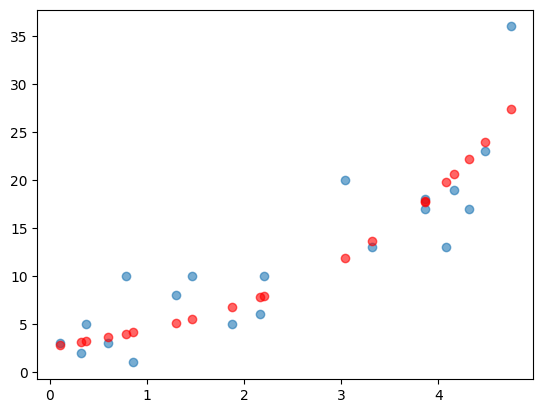

In [34]:
plt.scatter(X_test, y_test, label="Actual Spikes", alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label="Predicted Spikes", alpha=0.6)

Statsmodel

In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [39]:
np.random.seed(42)
n_samples = 100
X = np.random.uniform(0, 5, (n_samples, 1))  

In [40]:
beta0 = 1.0  
beta1 = 0.5  

In [41]:
lambda_ = np.exp(beta0 + beta1 * X).flatten()
y = np.random.poisson(lambda_)
df = pd.DataFrame({"Stimulus_Intensity": X.flatten(), "Spike_Count": y})

In [42]:
X = sm.add_constant(df["Stimulus_Intensity"])
poisson_model = sm.GLM(df["Spike_Count"], X, family=sm.families.Poisson()).fit()

In [43]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Spike_Count   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -254.90
Date:                Thu, 20 Feb 2025   Deviance:                       118.24
Time:                        10:47:03   Pearson chi2:                     112.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9929
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0509      0.081     12.932      0.000       0.892       1.210
Stimulus_Intensity     0.4743      0.023     20.897      0.000       0.430       0.519
======================================================================================
"""

In [44]:
poisson_model.llf

np.float64(-254.90213345656375)

Multiple predictors

In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [46]:
np.random.seed(42)
n_samples = 10000


X1 = np.random.uniform(0, 5, n_samples)   # Position
X2 = np.random.uniform(0, 10, n_samples)  # Head Direction
X3 = np.random.uniform(0, 3, n_samples)   # Speed
X4 = np.random.uniform(0, 2, n_samples)   # Theta Phase

In [47]:
beta0 = 1.0
beta1 = [0.5, -0.2, 0.3, 0.1]

In [49]:
lbda = np.exp(beta0 + beta1[0]*X1 + beta1[1]*X2 + beta1[2]*X3 + beta1[3]*X4)
y = np.random.poisson(lbda)
df = pd.DataFrame({
    "Position": X1, 
    "Head_Direction": X2, 
    "Speed": X3, 
    "Theta_Phase": X4, 
    "Spike_Count": y
})

In [50]:
X = df[['Position', 'Head_Direction', 'Speed', 'Theta_Phase']]
X = sm.add_constant(X)
y = df['Spike_Count']

In [52]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Spike_Count   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9995
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22665.
Date:                Thu, 20 Feb 2025   Deviance:                       10507.
Time:                        11:11:31   Pearson chi2:                 9.90e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0086      0.014     72.526      0.000       0.981       1.036
Position           0.5029      0.003    191.785      0.000       0.498       0.508
Head_Direction    -0.2030      0.001   -161.635      0.000      -0.205      -0.201
Speed              0.3011      0.004     76.853      0.000       0.293       0.309
Theta_Phase        0.0854      0.006     14.955      0.000       0.074       0.097
==================================================================================
"""

Forward Selection Model

1. Select best performing single model.
2. Find the best performing double model that includes the single model
3. So on...
4. Use statistical tests to determine the best final model

In [66]:
# Selecting best performing single model

predictors = ['Position', 'Head_Direction', 'Speed', 'Theta_Phase']
selected_vars = []
best_model = None
best_mse = np.inf
best_llh = -np.inf

best_single = None
mse_values = {}
llh_values = {}

for var in predictors:
    X = sm.add_constant(df[[var]])
    model = sm.GLM(df['Spike_Count'], X, family=sm.families.Poisson()).fit()
    y_pred = model.predict(X)
    mse = mean_squared_error(df["Spike_Count"], y_pred)
    log_liklihood = model.llf

    mse_values[var] = mse
    llh_values[var] = log_liklihood

    print(var, mse, log_liklihood)

    if mse < best_mse and log_liklihood > best_llh:
        best_mse = mse
        best_llh = log_liklihood
        best_single = var
        best_model = model

selected_vars.append(best_single)
predictors.remove(best_single)

Position 61.47479489789695 -40508.36267908587
Head_Direction 74.43542975055344 -46782.34547505366
Speed 96.47729998018292 -58347.920863610474
Theta_Phase 102.07421512342871 -61358.38896034797


In [67]:
# best double model with best single predictor

best_two = None
best_mse_two = np.inf
best_llh_two = -np.inf

for var in predictors:
    print(var)
    X = sm.add_constant(df[selected_vars + [var]])
    model = sm.GLM(df['Spike_Count'], X, family=sm.families.Poisson()).fit()
    y_pred = model.predict(X)
    mse = mean_squared_error(df['Spike_Count'], y_pred)
    log_liklihood = model.llf

    if mse < best_mse_two and log_liklihood > best_llh_two:
        best_mse_two = mse
        best_llh_two = log_liklihood
        best_two = var
        best_model = model

selected_vars.append(best_two)
predictors.remove(best_two)

Head_Direction
Speed
Theta_Phase


In [68]:
selected_vars

['Position', 'Head_Direction']

In [70]:
# best triple model with best double predictor

best_three = None
best_mse_three = np.inf
best_llh_three = -np.inf

for var in predictors:
    print(var)
    X = sm.add_constant(df[selected_vars + [var]])
    model = sm.GLM(df['Spike_Count'], X, family=sm.families.Poisson()).fit()
    y_pred = model.predict(X)
    mse = mean_squared_error(df['Spike_Count'], y_pred)
    log_liklihood = model.llf

    if mse < best_mse_three and log_liklihood > best_llh_three:
        best_mse_three = mse
        best_llh_three = log_liklihood
        best_three = var
        best_model = model

selected_vars.append(best_three)
predictors.remove(best_three)

Speed
Theta_Phase


In [71]:
selected_vars

['Position', 'Head_Direction', 'Speed']

In [72]:
# full model
X = sm.add_constant(df[selected_vars + predictors])  
full_model = sm.GLM(df["Spike_Count"], X, family=sm.families.Poisson()).fit()
y_pred = full_model.predict(X)
full_mse = mean_squared_error(df["Spike_Count"], y_pred)
full_llh = full_model.llf

In [76]:
# Choosing the best model by performing statistical testing

from scipy.stats import wilcoxon

p_llh_12 = wilcoxon([best_llh_two], [best_llh], alternative="greater")[1]
p_llh_23 = wilcoxon([best_llh_three], [best_llh_two], alternative="greater")[1]
p_llh_34 = wilcoxon([full_llh], [best_llh_three], alternative="greater")[1]

In [84]:
selected_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Spike_Count   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22777.
Date:                Thu, 20 Feb 2025   Deviance:                       10731.
Time:                        11:42:59   Pearson chi2:                 1.01e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0977      0.013     87.670      0.000       1.073       1.122
Position           0.5030      0.003    191.862      0.000       0.498       0.508
Head_Direction    -0.2035      0.001   -162.040      0.000      -0.206      -0.201
Speed              0.3007      0.004     76.797      0.000       0.293       0.308
==================================================================================
"""

In [85]:

if p_llh_12 < 0.05:
    if p_llh_23 < 0.05:
        if p_llh_34 < 0.05:
            selected_model = full_model
            final_vars = selected_vars + predictors
        else:
            selected_model = best_model
            final_vars = selected_vars
    else:
        selected_model = best_model
        final_vars = selected_vars[:-1]
else:
    print("Nope")
    selected_model = best_model
    final_vars = [selected_vars[0]]

Nope


In [86]:
selected_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Spike_Count   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22777.
Date:                Thu, 20 Feb 2025   Deviance:                       10731.
Time:                        11:43:53   Pearson chi2:                 1.01e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0977      0.013     87.670      0.000       1.073       1.122
Position           0.5030      0.003    191.862      0.000       0.498       0.508
Head_Direction    -0.2035      0.001   -162.040      0.000      -0.206      -0.201
Speed              0.3007      0.004     76.797      0.000       0.293       0.308
==================================================================================
"""